In [1]:
import pandas as pd
import numpy as np

# 📂Load the dataset
file_path = 'us_accidents_march23.csv'  
df = pd.read_csv(file_path)

# 🔍 Preview the data
df.head()
# Basic Exploration

# Check shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Overview of columns and types
df.info()

# Summary statistics for numerical columns
df.describe()

# Count of missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Rows: 7728394, Columns: 46
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          floa

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

Duplicate rows: 0


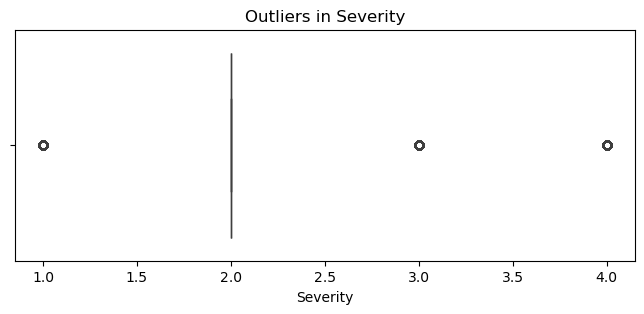

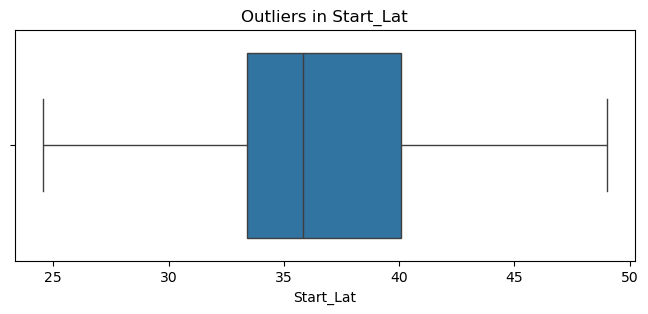

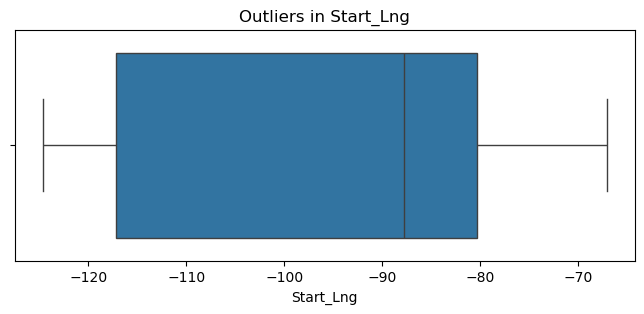

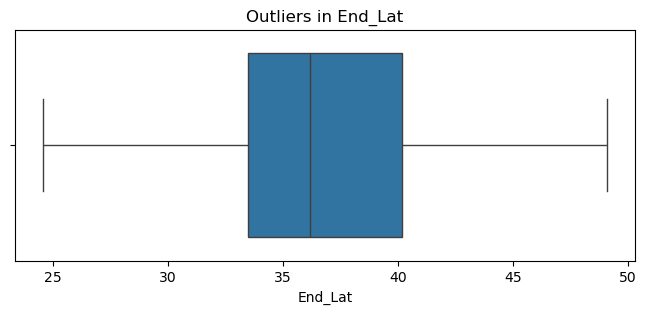

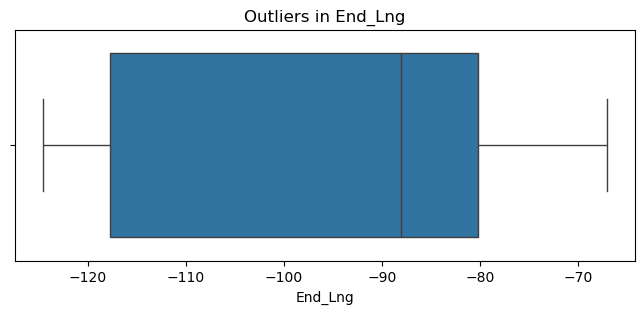

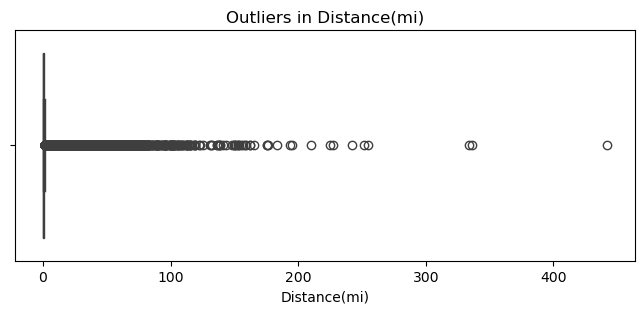

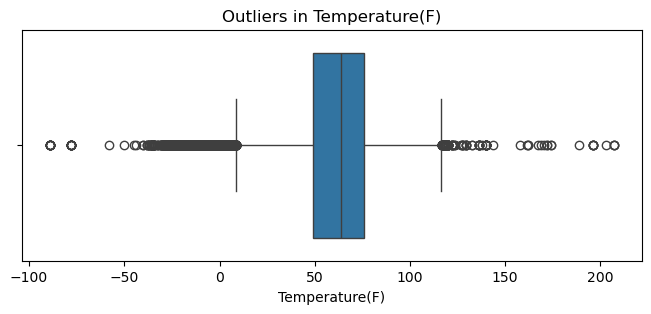

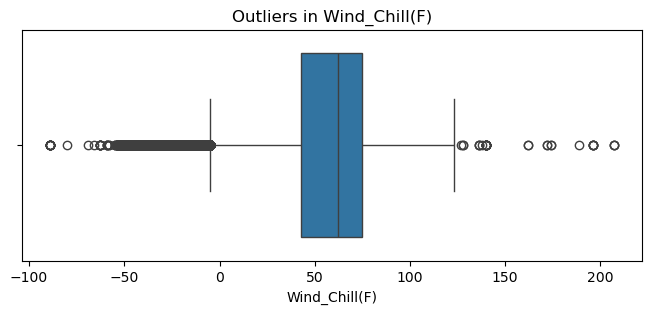

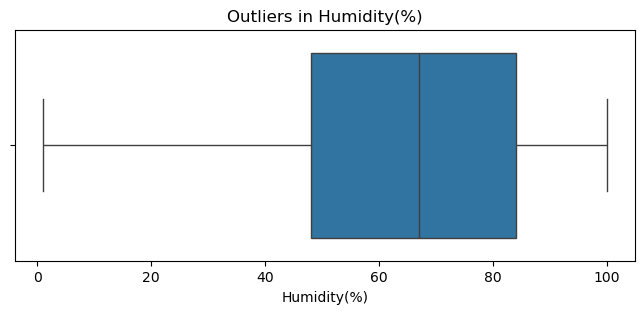

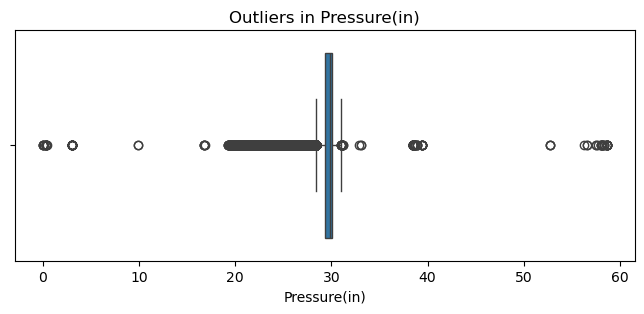

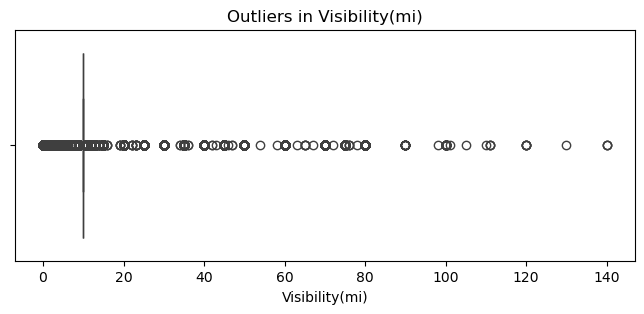

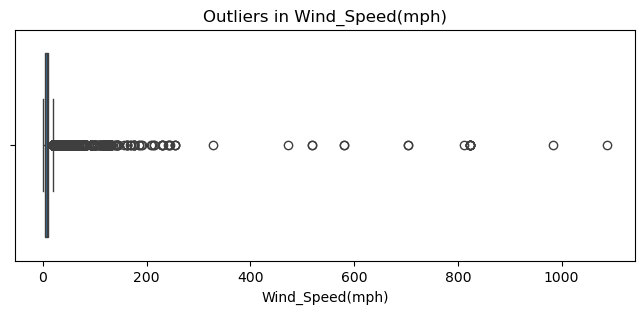

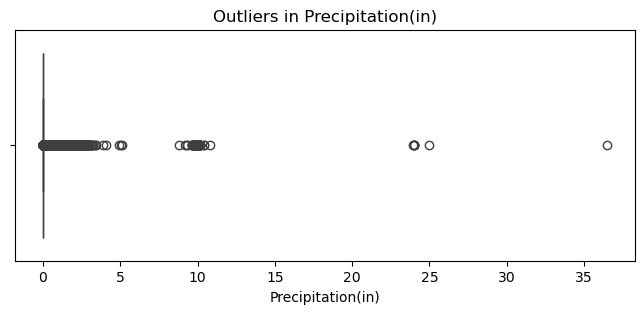

In [3]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check for outliers in numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Boxplots to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


In [4]:
# 📦 Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧼 1. OVERVIEW OF MISSING VALUES
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent', ascending=False)
missing_df.head(10)  # Display top 10 columns with missing data

,Missing Values,Percent
End_Lat,3402762,44.029355
End_Lng,3402762,44.029355
Precipitation(in),2203586,28.512858
Wind_Chill(F),1999019,25.865904
Wind_Speed(mph),571233,7.391355
Visibility(mi),177098,2.291524
Wind_Direction,175206,2.267043
Humidity(%),174144,2.253301
Weather_Condition,173459,2.244438
Temperature(F),163853,2.120143


In [7]:
# Drop columns with more than 40% missing values
threshold = 40
cols_to_drop = missing_df[missing_df['Percent'] > threshold].index
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Fill in minor missing values for selected features
df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown')
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())

In [10]:
# Convert time columns to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Drop rows where time conversion failed
df = df.dropna(subset=['Start_Time', 'End_Time'])

# Optional: convert categorical text columns to 'category' type to reduce memory
cat_columns = ['State', 'City', 'Weather_Condition', 'Sunrise_Sunset']
for col in cat_columns:
    if col in df.columns:
        df.loc[:, col] = df[col].astype('category')



In [11]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Example: remove outliers in 'Temperature(F)' and 'Wind_Speed(mph)'
for col in ['Temperature(F)', 'Wind_Speed(mph)']:
    if col in df.columns:
        df = remove_outliers(df, col)

In [12]:
# Duration of the accident in hours
df['Accident_Duration_hrs'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

# Extract useful date/time parts
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])


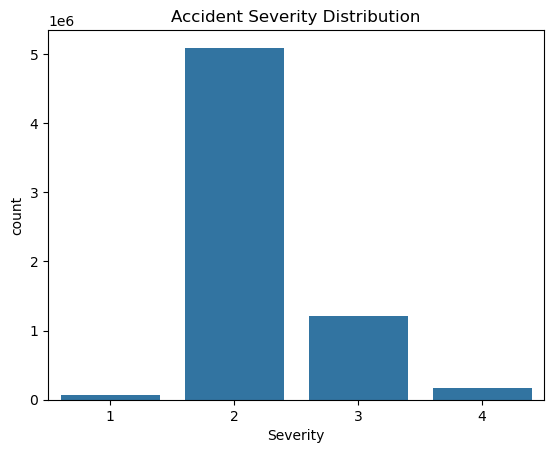

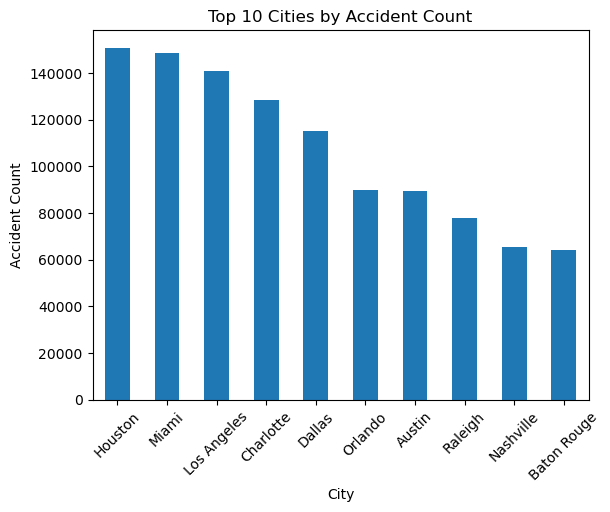

In [13]:
# Summary of numerical variables
df.describe()

# Summary of categorical variables
df.select_dtypes('category').describe()

# Plot: Distribution of severity
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')
plt.show()

# Plot: Top 10 cities with most accidents
top_cities = df['City'].value_counts().head(10)
top_cities.plot(kind='bar', title='Top 10 Cities by Accident Count')
plt.xlabel('City')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

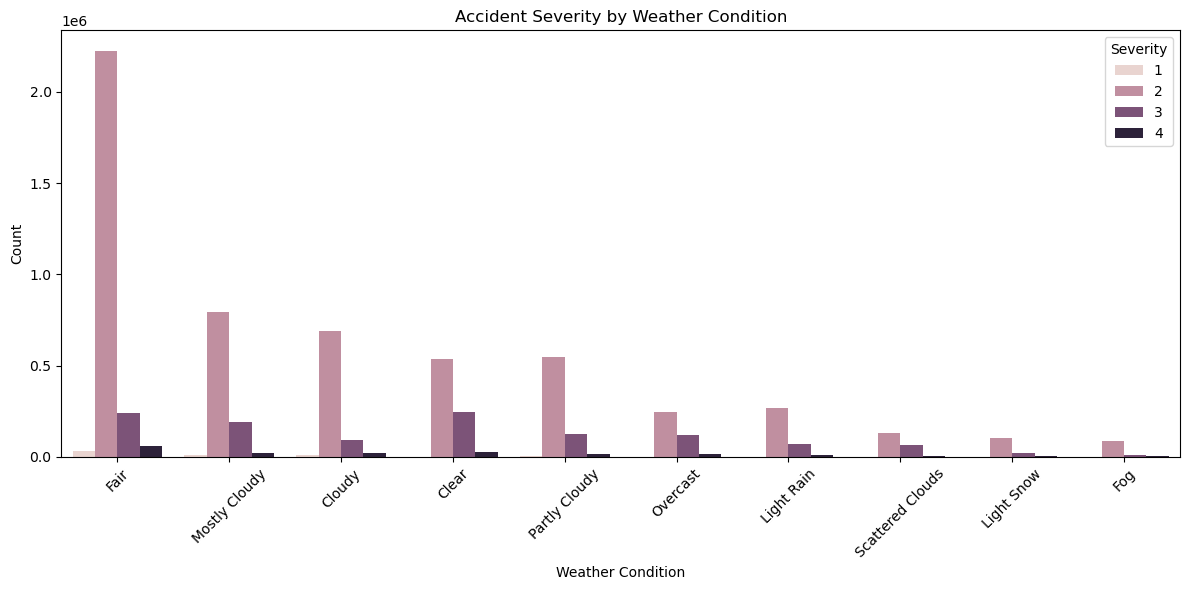

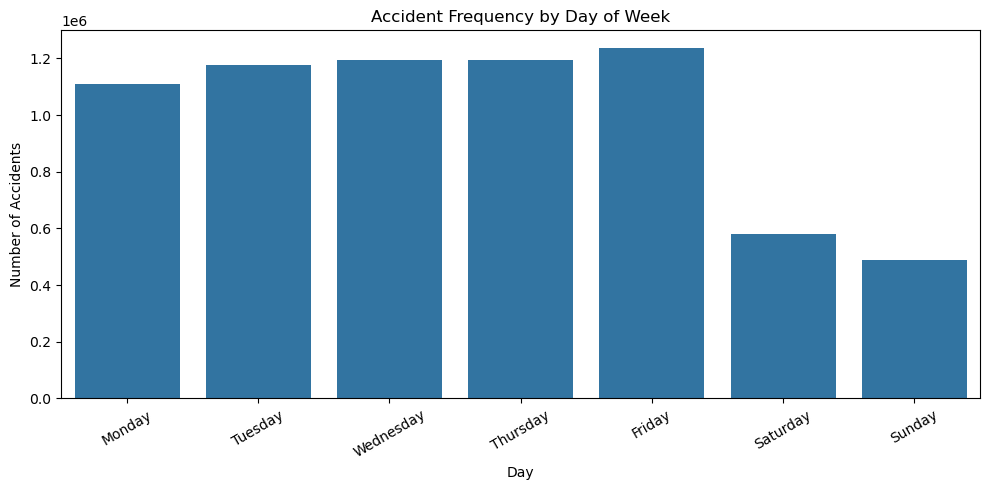

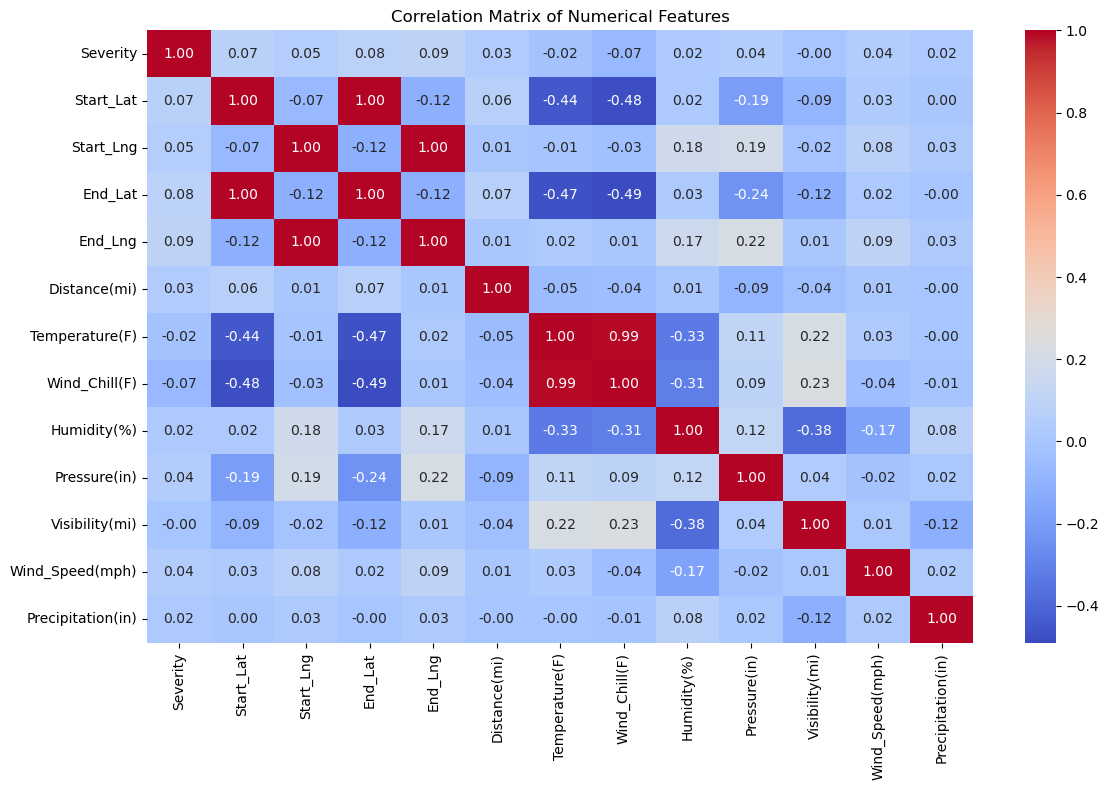

📊 Chi-square Test: Severity vs. Sunrise/Sunset
Chi-square p-value: 0.0000
✅ Statistically significant relationship between Severity and Time of Day.

📊 T-test: Visibility Difference between Severity 1 and Severity 4
T-test p-value: 0.0000
✅ Visibility is significantly different between low and high severity accidents.



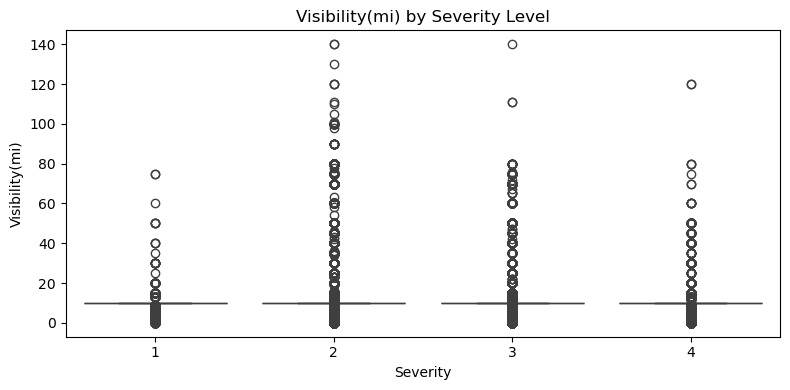

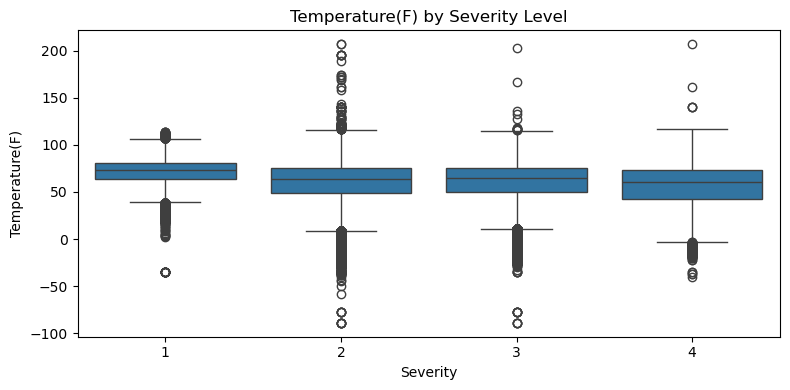

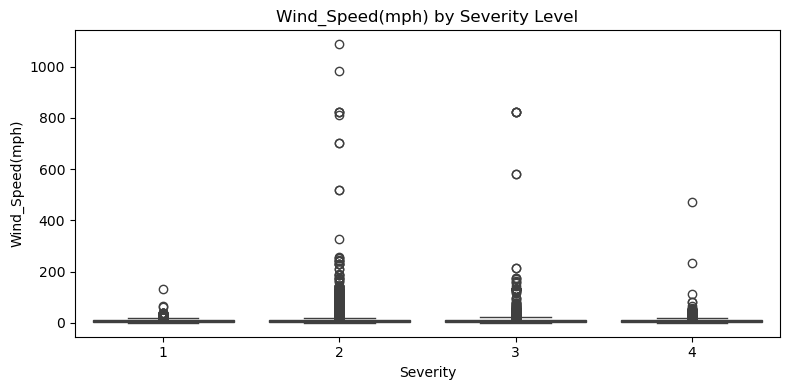

In [3]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# 📊 1. Visualization: Accident Severity by Weather Condition
top_weather = df['Weather_Condition'].value_counts().head(10).index
subset = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Condition', hue='Severity', data=subset, order=top_weather)
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


# 📅 2. Visualization: Accidents by Day of Week

# Ensure Start_Time is in datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract weekday name
df['Weekday'] = df['Start_Time'].dt.day_name()

plt.figure(figsize=(10, 5))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accident Frequency by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 📈 3. Correlation Heatmap of Numerical Features
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# 🧪 4. Chi-square Test: Severity vs. Sunrise/Sunset
if 'Sunrise_Sunset' in df.columns:
    crosstab = pd.crosstab(df['Severity'], df['Sunrise_Sunset'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print("📊 Chi-square Test: Severity vs. Sunrise/Sunset")
    print(f"Chi-square p-value: {p:.4f}")
    if p < 0.05:
        print("✅ Statistically significant relationship between Severity and Time of Day.\n")
    else:
        print("❌ No significant relationship.\n")

# 🧪 5. T-test: Severity 1 vs Severity 4 for Visibility
if 'Visibility(mi)' in df.columns:
    low_sev = df[df['Severity'] == 1]['Visibility(mi)'].dropna()
    high_sev = df[df['Severity'] == 4]['Visibility(mi)'].dropna()
    if not low_sev.empty and not high_sev.empty:
        t_stat, p_val = ttest_ind(low_sev, high_sev, equal_var=False)
        print("📊 T-test: Visibility Difference between Severity 1 and Severity 4")
        print(f"T-test p-value: {p_val:.4f}")
        if p_val < 0.05:
            print("✅ Visibility is significantly different between low and high severity accidents.\n")
        else:
            print("❌ No significant difference in visibility between severity levels.\n")

# 🎯 6. Boxplots: Feature Distributions by Severity
features = ['Visibility(mi)', 'Temperature(F)', 'Wind_Speed(mph)', 'Accident_Duration_hrs']
for feat in features:
    if feat in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Severity', y=feat, data=df)
        plt.title(f'{feat} by Severity Level')
        plt.tight_layout()
        plt.show()